In [1]:
print("Hello WOrld")

Hello WOrld


Number of Contours found = 5


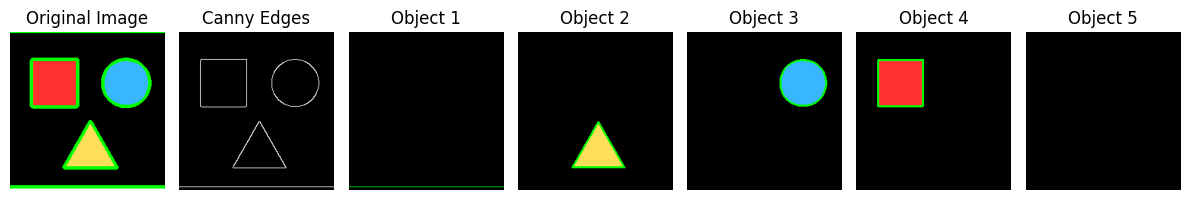

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('shape.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform Canny edge detection
edged = cv2.Canny(gray, 30, 200)

# Finding Contours
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Number of Contours found = " + str(len(contours)))

# Draw all contours on the original image
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

# Create a list to store cropped images of each object
cropped_images = []

# Iterate through contours
for i, contour in enumerate(contours):
    # Create a mask image for each contour
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    # Extract the object using the mask

    object_extracted = np.zeros_like(image)
    object_extracted[mask == 255] = image[mask == 255]
    # Convert BGR to RGB for displaying with Matplotlib
    object_extracted_rgb = cv2.cvtColor(object_extracted, cv2.COLOR_BGR2RGB)
    # Append the extracted object to the list
    cropped_images.append(object_extracted_rgb)
fig, axs = plt.subplots(1, len(cropped_images)+2, figsize=(12, 4))

# Plot the original image
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(edged, cmap='gray')
axs[1].set_title('Canny Edges')
axs[1].axis('off')

for i in range(len(cropped_images)):
    axs[i+2].imshow(cropped_images[i])
    axs[i+2].set_title(f'Object {i+1}')
    axs[i+2].axis('off')

plt.tight_layout()
plt.show()